In [17]:
# Çok Değişkenli Aykırı Değer Analizi ( Local Outlier Factor )
# Gözlemeleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer tanımı yapamamıza olanak sağlar.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install missingno
#import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler,RobustScaler

In [6]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [11]:
def outlier_tresholds(df,col_name,q1=.25,q3=.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit , up_limit

# Var mı yok mu fonksiyonlaştırma
def check_outlier(df,col_name):
    low_limit, up_limit = outlier_tresholds(df,col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [12]:
for col in df.columns:
    print(col,check_outlier(df,col))

carat True
depth True
table True
price True
x True
y True
z True


In [13]:
# Aykırı değer sayısı
low, up = outlier_tresholds(df,"carat")
df[((df["carat"]<low) | (df["carat"]>up))].shape

(1889, 7)

In [18]:
# Bu algoritma, bir veri noktasının komşularıyla olan yoğunluğunu hesaplayarak aykırı olup olmadığını belirler.
# Komşuluk sayısı 20
clf = LocalOutlierFactor(n_neighbors=20)

In [25]:
# Veri noktalarını küme veya aykırı gözlem olup olmadığına göre etiketler.
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [33]:
# Her veri noktasının aykırılık derecesini elde edebiliriz.
df_scores = clf.negative_outlier_factor_

In [34]:
#df_scores = -df_scores -> Pozitif almak istersek
# -1'e yakın en iyi
df_scores[0:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [35]:
# En kötü 5 değer
np.sort(df_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

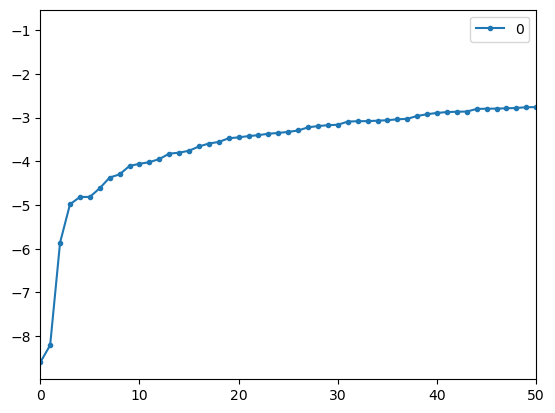

In [37]:
# Eşik değerlere göre grafik oluşturmak
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True,xlim=[0,50],style=".-")
plt.show()

In [38]:
# Grafiğe göre en dik kısım burdan sonra değerler benzer
# Eşik değer olarak aldık
th = np.sort(df_scores)[3]

In [39]:
# Aykırı değerleri aldık
df[df_scores<th]

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [40]:
# Aykırı değerleri sildik.
df[df_scores<th].drop(axis=0,labels=df[df_scores<th].index)

,carat,depth,table,price,x,y,z
